# Proyek Analisis Data : Bike Sharing Dataset
- Nama : Muhammad Yazid Pratama
- Email : muhammadyazidpratama06@gmail.com
- ID Dicoding : muhammadyazidpratama

# Menentukan Pertanyaan Bisnis
- Bagaimana tren peminjaman berdasarkan musim? Apakah ada perbedaan signifikan antara musim panas dan musim dingin dalam peminjaman sepeda?
- Apakah ada perbedaan dalam peminjaman sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren peminjaman sepeda?
- Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling 

## Gathering Data
#### Background
Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang mencakup lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari penerapan sistem bike sharing di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.
#### Dataset
Proses persewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku sewa. Kumpulan data inti terkait dengan
catatan sejarah dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang merupakan
tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data setiap dua jam dan setiap hari, lalu
mengekstraksi dan menambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

#### Dataset characteristics	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
# load days data
days_df = pd.read_csv('day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load hours data
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai data days_df

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada days_df sudah lengkap. Akan tetapi, atribut dteday akan memerlukan konversi tipe dari tipe object atau string ke timestamp. Atribut seperti season, holiday, workingday, & sebagainya memerlukan konversi tipe dari integer ke categorical untuk pemahaman yang tepat. Agar data lebih mudah dipahami, nama atribut perlu dibersihkan.

In [5]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada days_df. 

### Menilai data hours_df

In [6]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada hours_df sudah lengkap. Akan tetapi, atribut dteday akan memerlukan konversi tipe dari tipe object atau string ke timestamp. Atribut seperti season, holiday, workingday, & sebagainya memerlukan konversi tipe dari integer ke categorical untuk pemahaman yang tepat. Agar data lebih mudah dipahami, nama atribut perlu dibersihkan.

In [7]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada hours_df. 

Jika diperhatikan, dataset days_df dan hours_df memiliki atribut yang sama hanya ada tambahan hr(hour) pada dataset hours_df. Untuk analisis lebih lanjut, kita akan menggunakan dataset hours_df.

In [8]:
bikes_df = hours_df.copy()

## Cleaning Data

In [9]:
# mengganti tipe data
bikes_df['dteday'] = pd.to_datetime(bikes_df['dteday'])

columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns:
    bikes_df[column] = bikes_df[column].astype('category')

In [10]:
# rename kolom
bikes_df.rename(columns={
    'instant':'rec_id',
    'dteday':'datetime',
    'holiday':'is_holiday',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'mnth':'month',
    'cnt':'total_count',
    'yr':'year',
    'hr' : 'hour'
}, inplace=True)

In [11]:
#Mapping variables season, month, weathersit, weekday
bikes_df['season']=bikes_df.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
bikes_df['month']=bikes_df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes_df['weather_condition']=bikes_df.weather_condition.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikes_df['weekday']=bikes_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikes_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
#Checking the unique values in the data
bikes_df.nunique().sort_values()

is_workingday            2
year                     2
is_holiday               2
season                   4
weather_condition        4
weekday                  7
month                   12
hour                    24
windspeed               30
temp                    50
atemp                   65
humidity                89
casual                 322
datetime               731
registered             776
total_count            869
rec_id               17379
dtype: int64

# Exploratory Data Analysis

### Menentukan Pertanyaan Bisnis
Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut:
- Bagaimana tren penggunaan sepeda berdasarkan musim? Apakah ada perbedaan signifikan antara musim panas dan musim dingin dalam peminjaman sepeda?
- Apakah ada perbedaan dalam permintaan sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren penggunaan sepeda?
- Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

In [13]:
bikes_df.describe(include='all')

C:\Users\rhjha\AppData\Local\Temp\ipykernel_2500\2878332614.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikes_df.describe(include='all')


,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379,17379.0,17379,17379.0,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12,24.0,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,May,17.0,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488,730.0,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah penyewaan sepeda yang tersimpan adalah **17.379**. Sekitar 1 sampai 977 perjam peminjaman sepeda dengan rata-rata peminjam sebesar **189,46**. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup banyak peminat.

In [14]:
bikes_df.groupby(by='season').agg({
    "total_count" : ['min', 'max', 'mean']
})

total_count                 
               min  max        mean
season                             
Spring           1  801  111.114569
Summer           1  957  208.344069
Fall             1  977  236.016237
Winter           1  967  198.868856

Berdasarkan hasil tersebut, terlihat bahwa peminjaman terbanyak terjadi pada musim **Gugur** dengan rata-rata peminjaman sebesar **236,01**

In [15]:
bikes_df.groupby(by='weather_condition').agg({
    "total_count" : ['min', 'max', 'mean']
})

total_count                 
                          min  max        mean
weather_condition                             
Clear                       1  977  204.869272
Mist + Cloudy               1  957  175.165493
Light Snow                  1  891  111.579281
Snow + Fog                 23  164   74.333333

Berdasarkan hasil tersebut, terlihat bahwa peminjaman terbanyak terjadi pada kondisi cuaca lagi **Cerah** dengan rata-rata peminjaman sebesar **204,87**

In [16]:
bikes_df.groupby(by="weekday").agg({
    "total_count" : ['min', 'max', 'mean']
})

total_count                 
                min  max        mean
weekday                             
Sun               1  776  177.468825
Mon               1  968  183.744655
Tue               1  970  191.238891
Wed               1  977  191.130505
Thu               1  976  196.436665
Fri               1  957  196.135907
Sat               1  783  190.209793

Berdasarkan hasil tersebut, terlihat bahwa peminjaman terbanyak terjadi pada hari **Kamis** dengan rata-rata peminjaman sebesar **196,43**

In [17]:
bikes_df.groupby(by="hour").agg({
    "total_count" : ['min', 'max', 'mean']
})

total_count                 
             min  max        mean
hour                             
0              2  283   53.898072
1              1  168   33.375691
2              1  132   22.869930
3              1   79   11.727403
4              1   28    6.352941
5              1   66   19.889819
6              1  213   76.044138
7              1  596  212.064649
8              5  839  359.011004
9             14  426  219.309491
10             8  539  173.668501
11            10  663  208.143054
12             3  776  253.315934
13            11  760  253.661180
14            12  750  240.949246
15             7  750  251.233196
16            11  783  311.983562
17            15  976  461.452055
18            23  977  425.510989
19            11  743  311.523352
20            11  567  226.030220
21             6  584  172.314560
22             9  502  131.335165
23             2  256   87.831044

Berdasarkan hasil tersebut, terlihat bahwa peminjaman terbanyak terjadi pada jam **5 sore** dengan rata-rata peminjaman sebesar **461,45**

# Visualization & Explanatory Analysis

### Visualisasi Numeric Variables

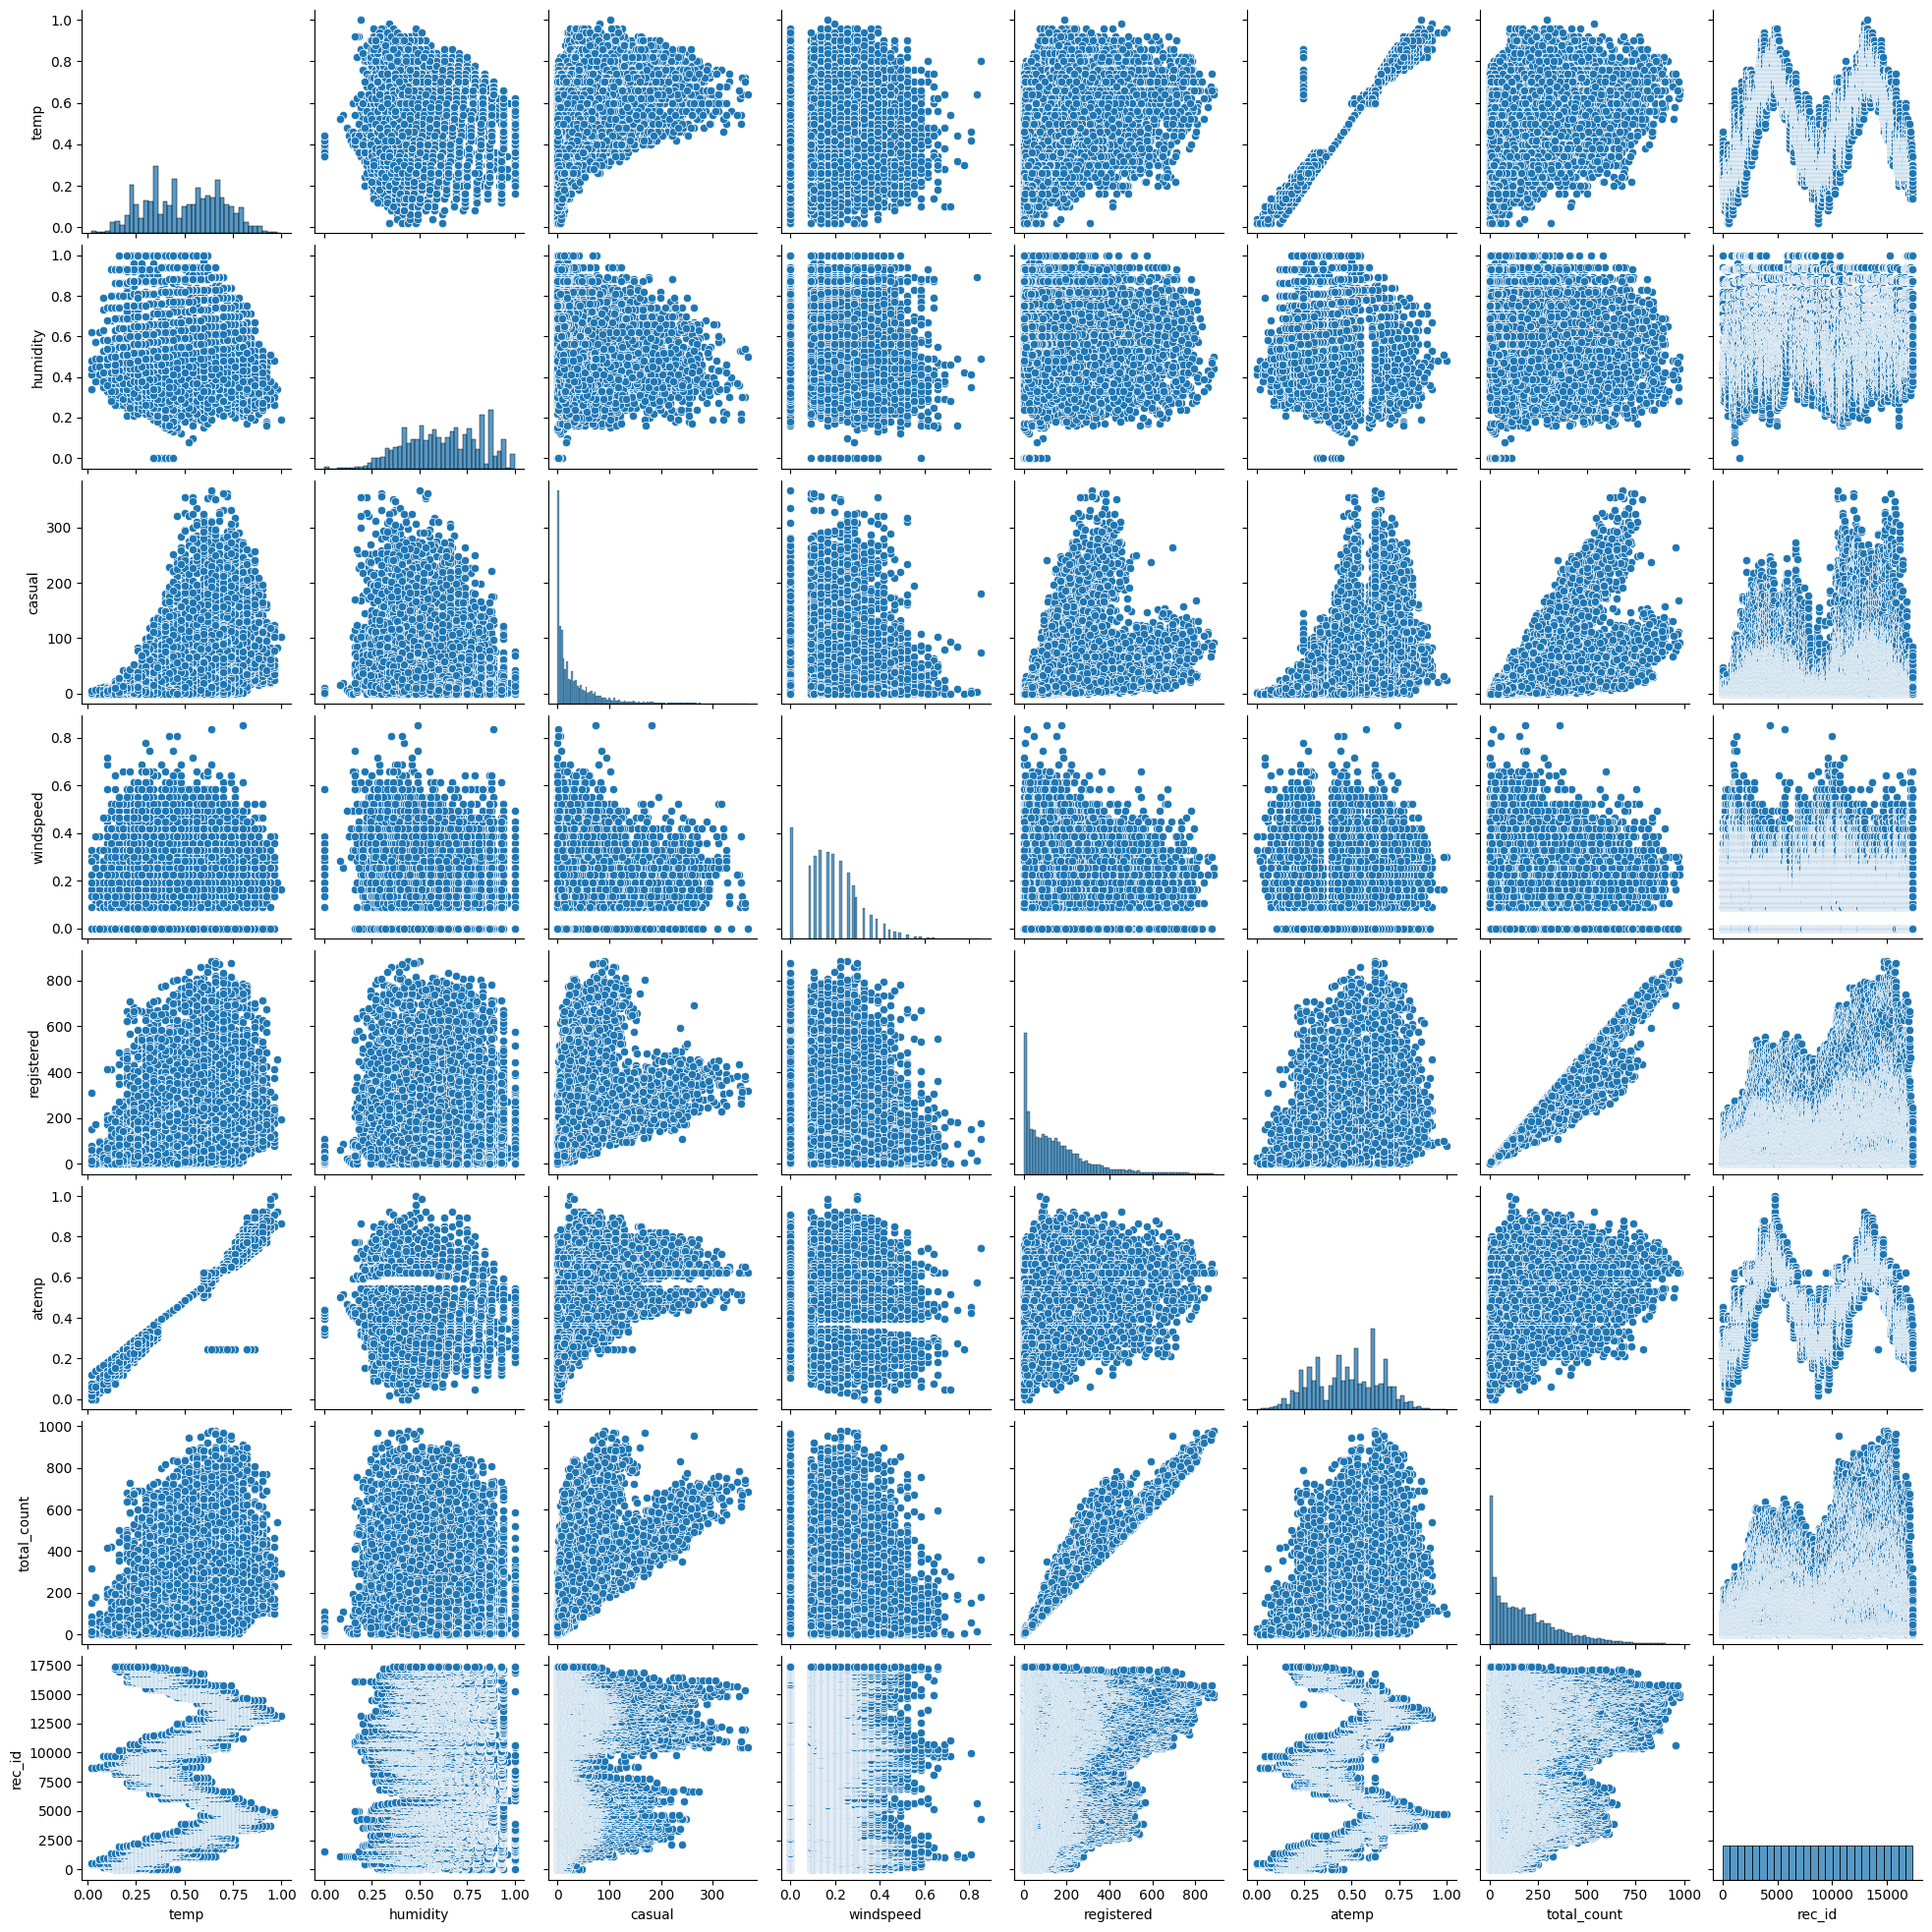

In [18]:
# pairplot of numerical variables
sns.pairplot(bikes_df, vars=["temp", "humidity",'casual','windspeed','registered','atemp','total_count','rec_id'])
plt.show()

Berdasarkan hasil tersebut, terlihat bahwa ada beberapa variable independent yang terlihat berkorelasi positif dengan variable **count**

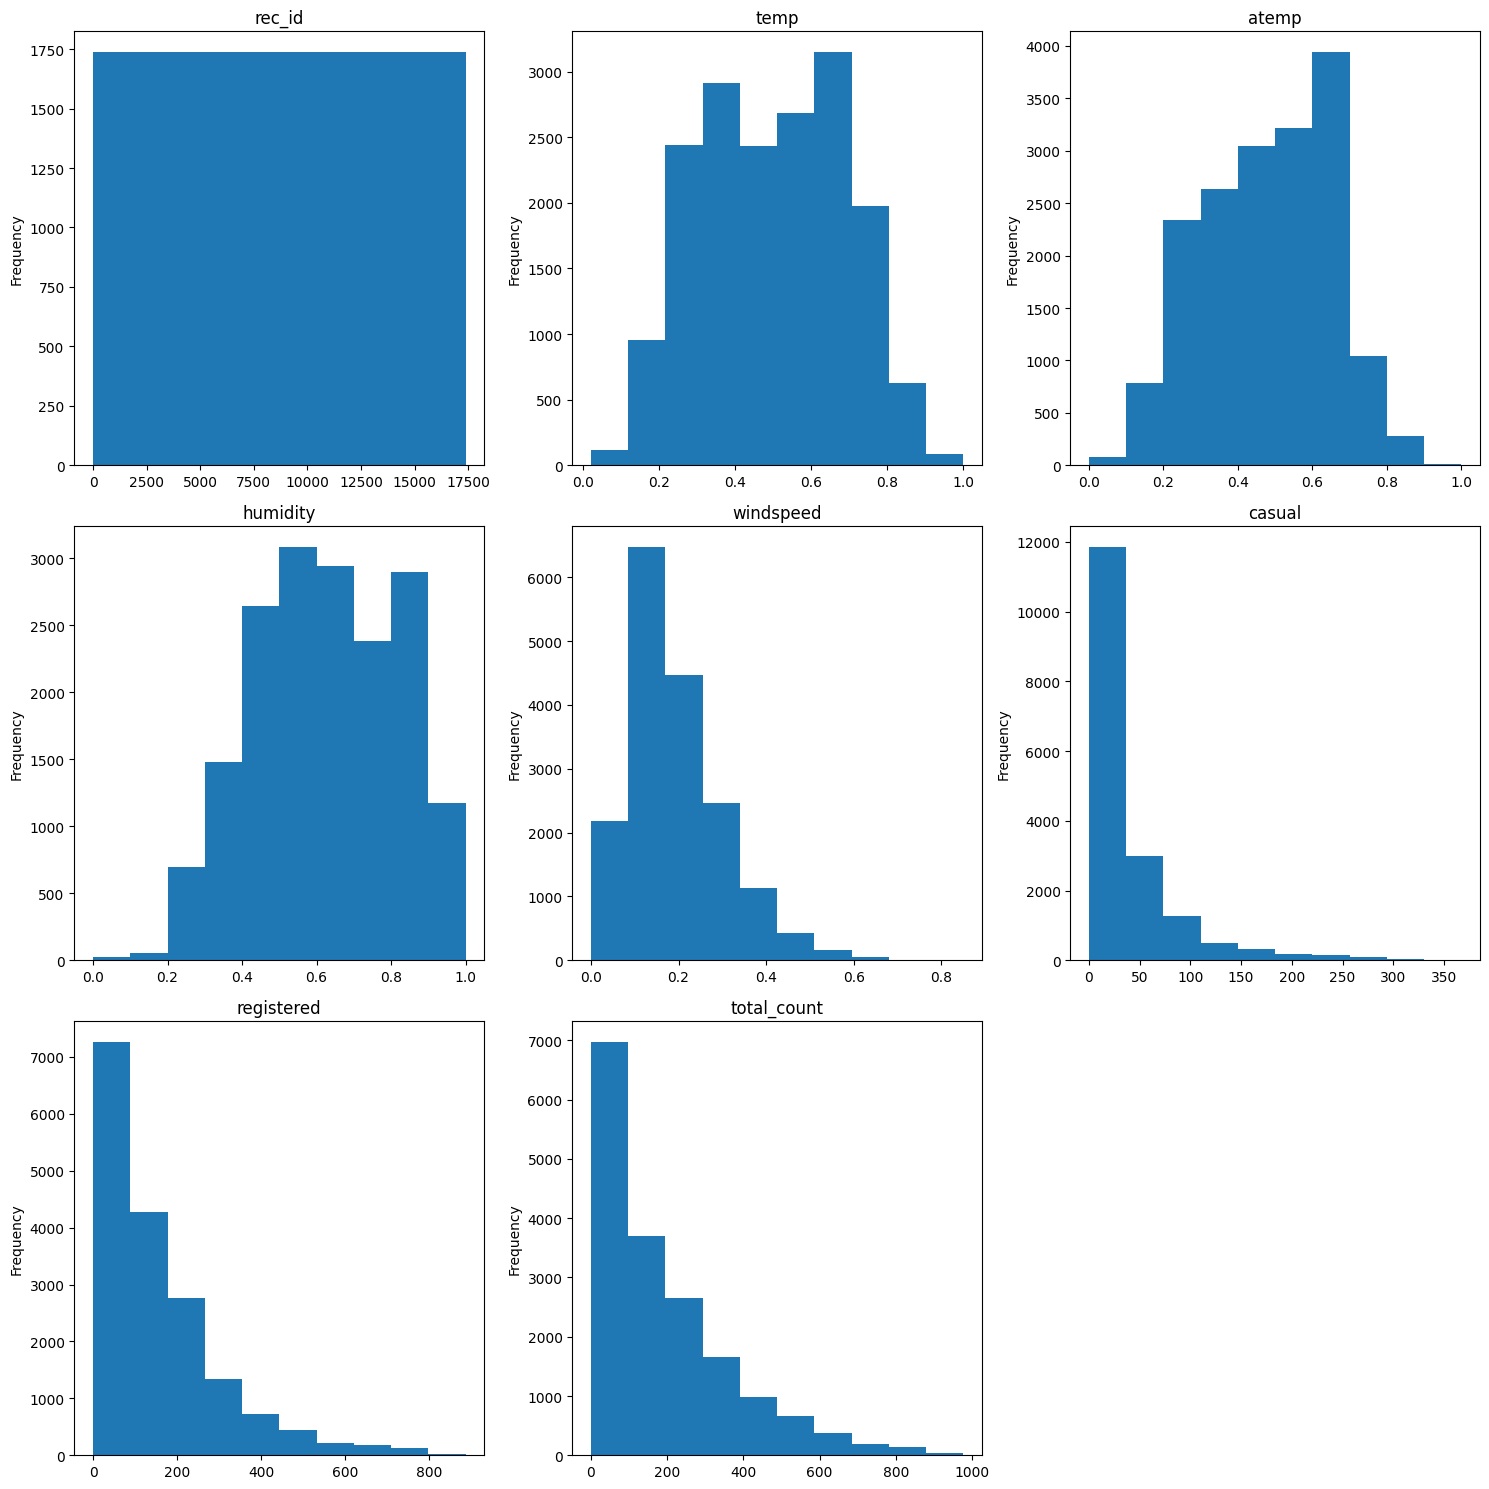

In [19]:
# Get numerical variables
num_vars = bikes_df.select_dtypes(include=['int', 'float']).columns.tolist()

# Determine subplot layout
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3

# Create subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Plot histogram for each numerical variable
for i, var in enumerate(num_vars):
    bikes_df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()

In [20]:
bikes_df.skew(numeric_only = True)

rec_id         0.000000
temp          -0.006021
atemp         -0.090429
humidity      -0.111287
windspeed      0.574905
casual         2.499237
registered     1.557904
total_count    1.277412
dtype: float64

Berdasarkan hasil tersebut, terlihat bahwa beberapa atribut memiliki distribusi data yang berbeda seperti berikut:
#### right-skewed
- windspeed
- casual
- registered
- total count
#### left-skewed
- temp
- atemp
- humidity

### Visualisasi Categorical Variables

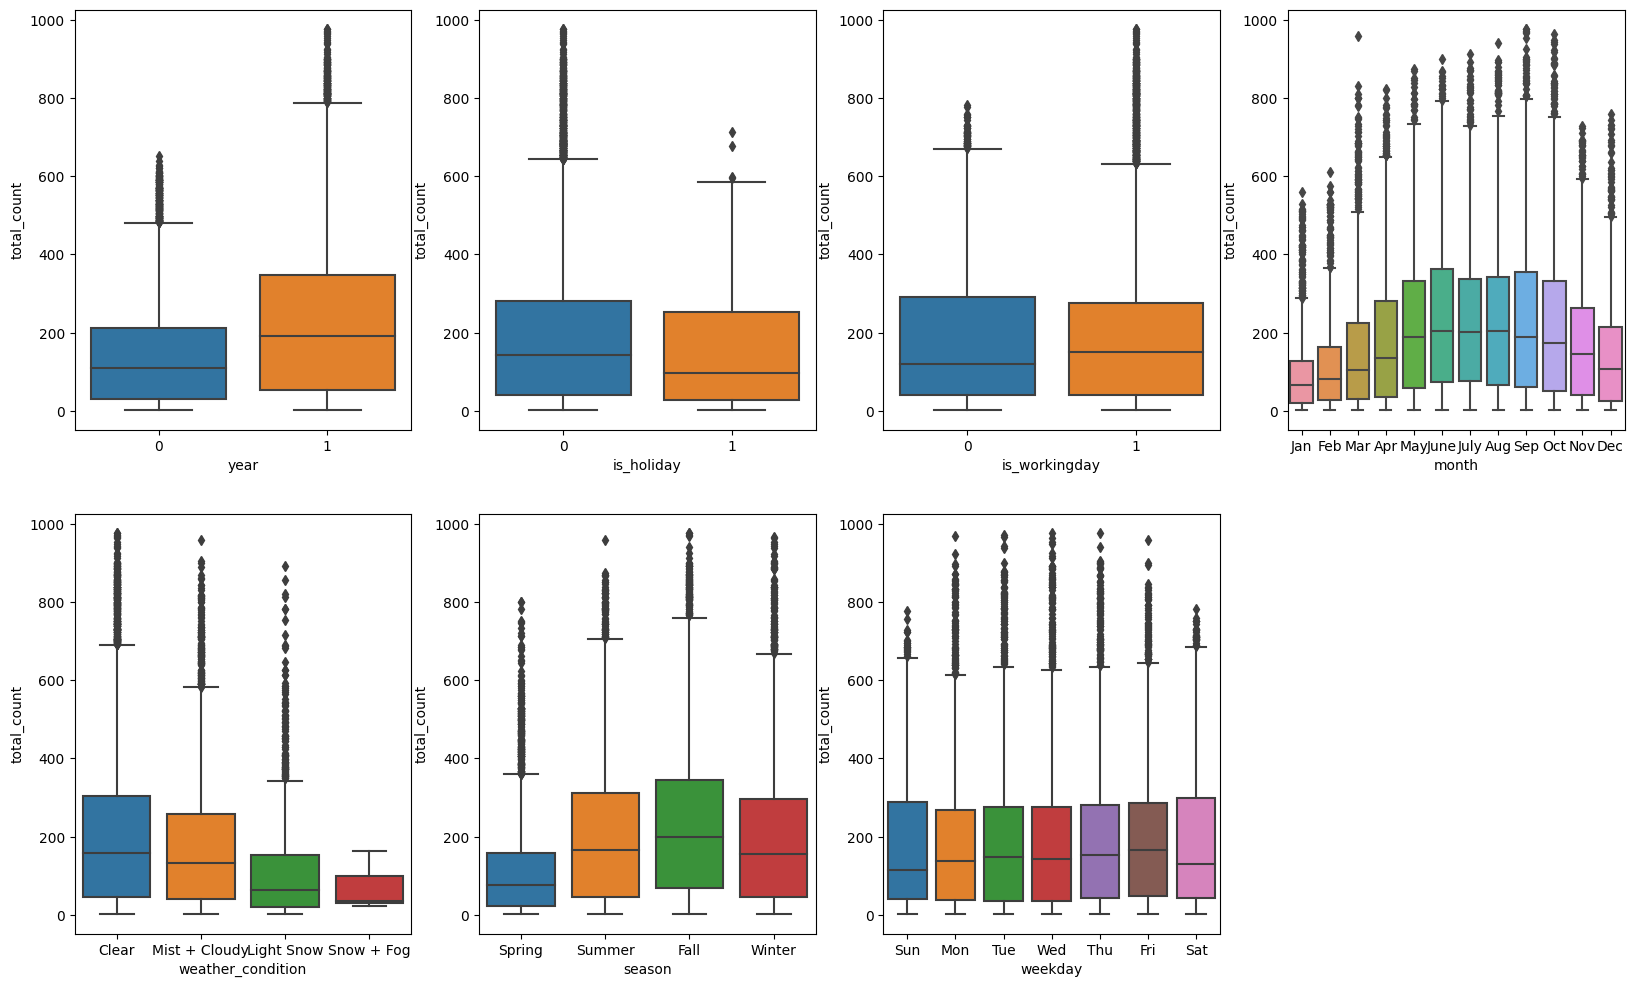

In [21]:
#Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'total_count', data = bikes_df)

plt.subplot(2,4,2)
sns.boxplot(x = 'is_holiday', y = 'total_count', data = bikes_df)

plt.subplot(2,4,3)
sns.boxplot(x = 'is_workingday', y = 'total_count', data = bikes_df)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'total_count', data = bikes_df)

plt.subplot(2,4,5)
sns.boxplot(x = 'weather_condition', y = 'total_count', data = bikes_df)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'total_count', data = bikes_df)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'total_count', data = bikes_df)

plt.show()

Berdasarkan hasil tersebut, menunjukkan hubungan antara variabel kategori dan variabel Target.

Peminjaman sepeda lebih :
- Pada tahun 2012 dari pada 2011
- Pada bulan juni
- Pada kondisi cuaca cerah
- Pada musim gugur
- Pada hari sabtu dan minggu

### Heatmap

C:\Users\rhjha\AppData\Local\Temp\ipykernel_2500\2359509710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bikes_df.corr(), cmap='RdYlGn', annot = True)


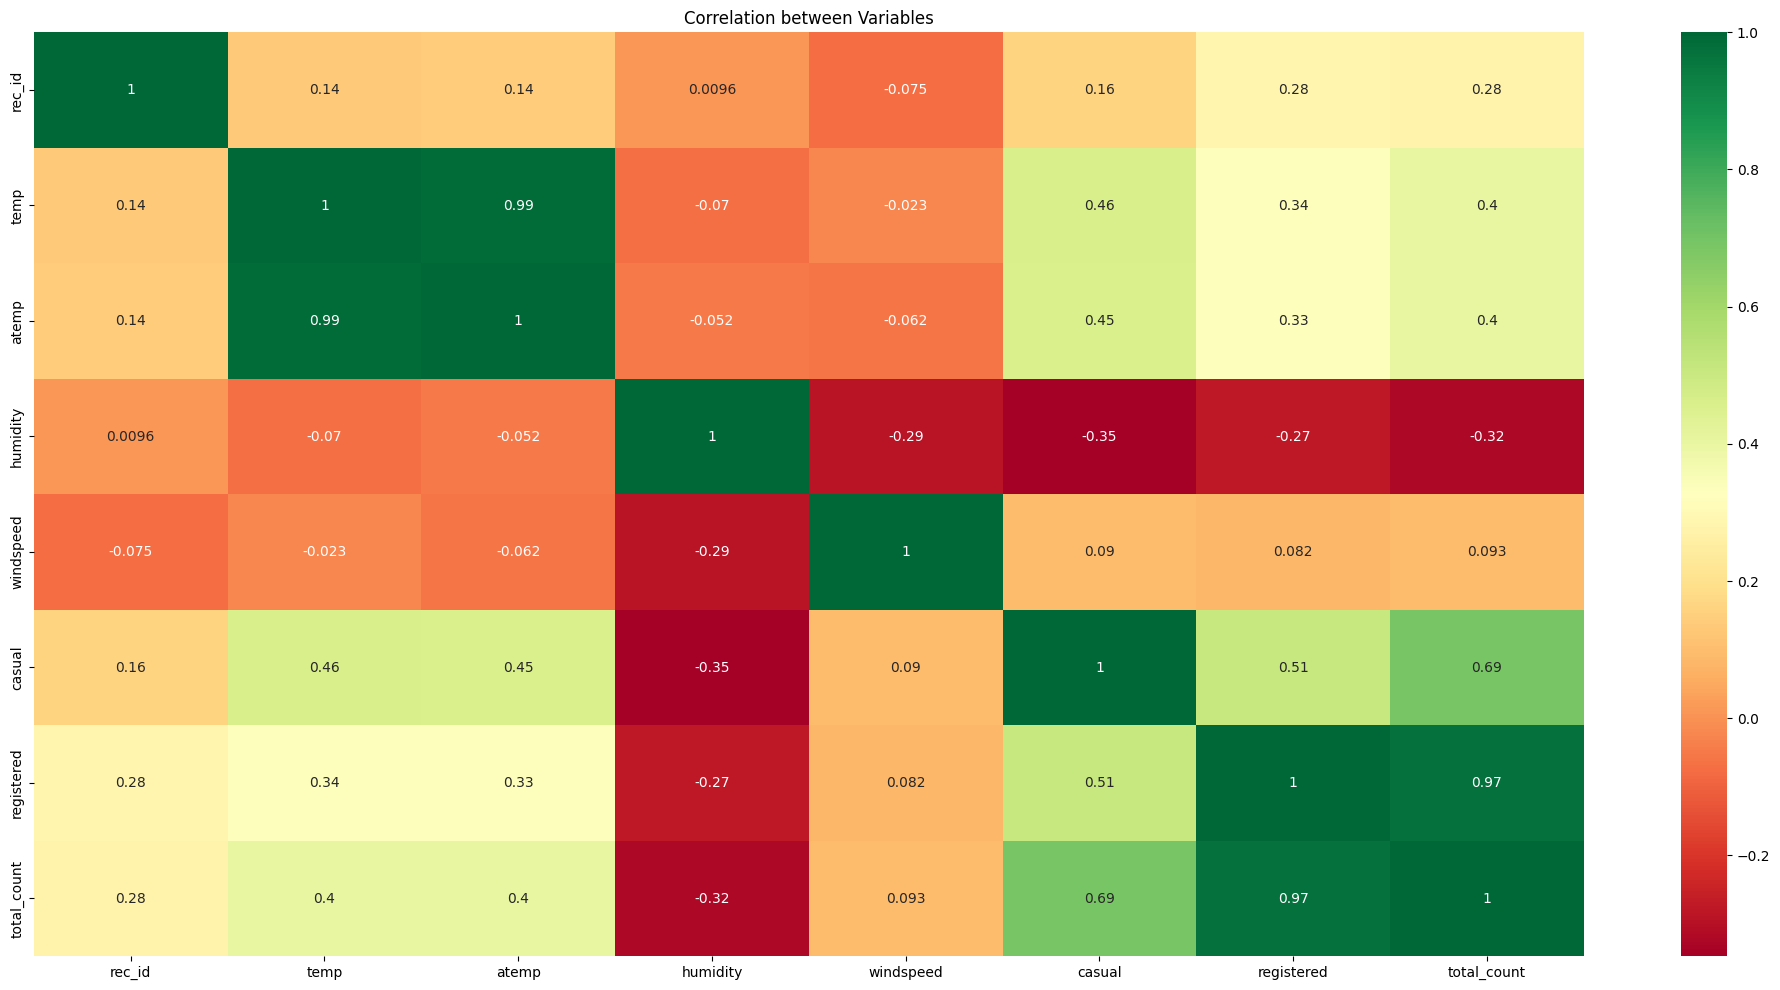

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bikes_df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

Berdasarkan hasil tersebut, terlihat bahwa variabel temp, atemp, casual, registered, rec_id berkorelasi dengan variabel 'total_count'

### Answer questions with visualization

#### Bagaimana tren peminjaman berdasarkan musim? Apakah ada perbedaan signifikan antara musim panas dan musim dingin dalam peminjaman sepeda?

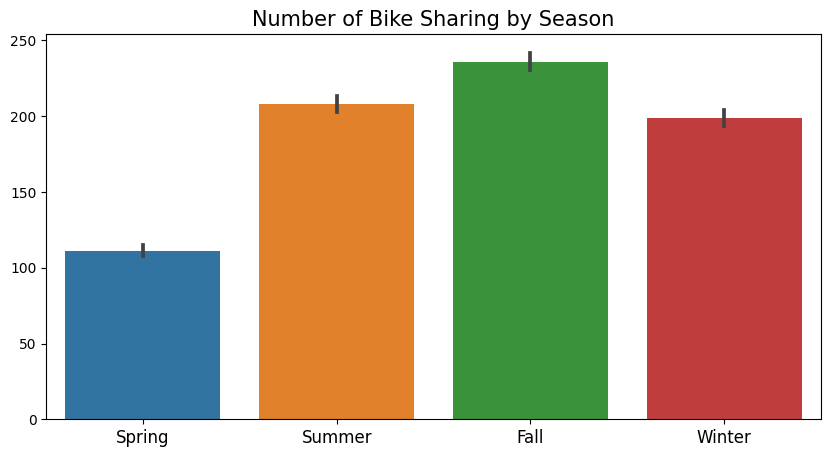

In [23]:
plt.figure(figsize=(10,5))

sns.barplot(
    y='total_count',
    x='season',
    data=bikes_df.sort_values(by='total_count', ascending=False),
)

plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan hasil tersebut, terlihat bahwa tren peminjaman sepeda terbanyak terjadi pada musim **gugur**. Pada musim panas dan dingin tidak ada perbedaan yang cukup signifikan, karena gap antara kedua musim tidak terlalu jauh. 

#### Apakah ada perbedaan dalam peminjaman sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren peminjaman sepeda?

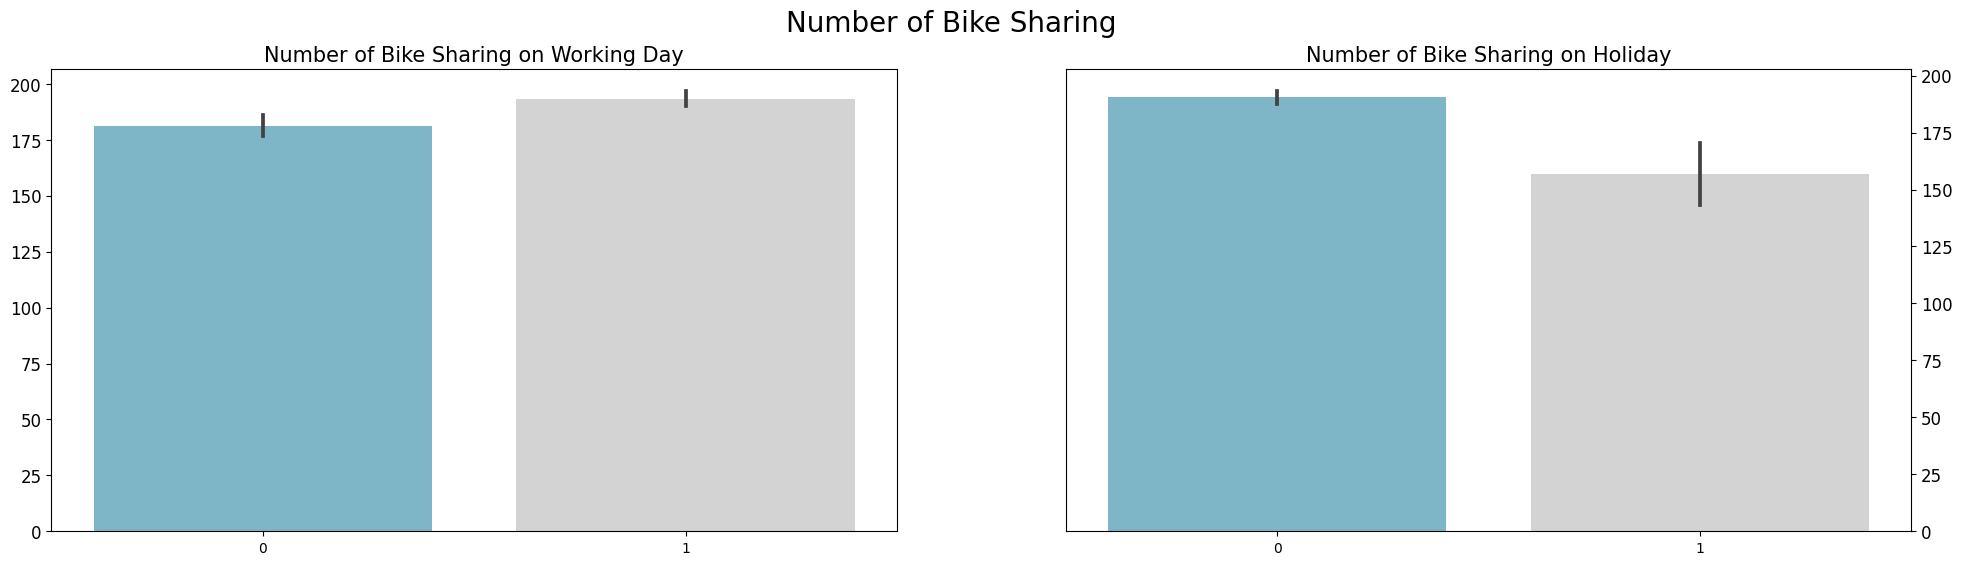

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(y="total_count", x="is_workingday", data=bikes_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of Bike Sharing on Working Day", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(y="total_count", x="is_holiday", data=bikes_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Number of Bike Sharing on Holiday", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Number of Bike Sharing", fontsize=20)
plt.show()

Berdasarkan hasil tersebut, terlihat bahwa peminjaman sepeda cenderung lebih tinggi pada **hari kerja** daripada pada hari libur. Peminjaman sepeda pada hari libur tampaknya lebih rendah dibandingkan dengan hari kerja, mungkin karena orang cenderung memilih beristirahat atau menghabiskan waktu bersama keluarga.

#### Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

[Text(0.5, 1.0, 'Count of Bikes During Weekdays and Weekend')]

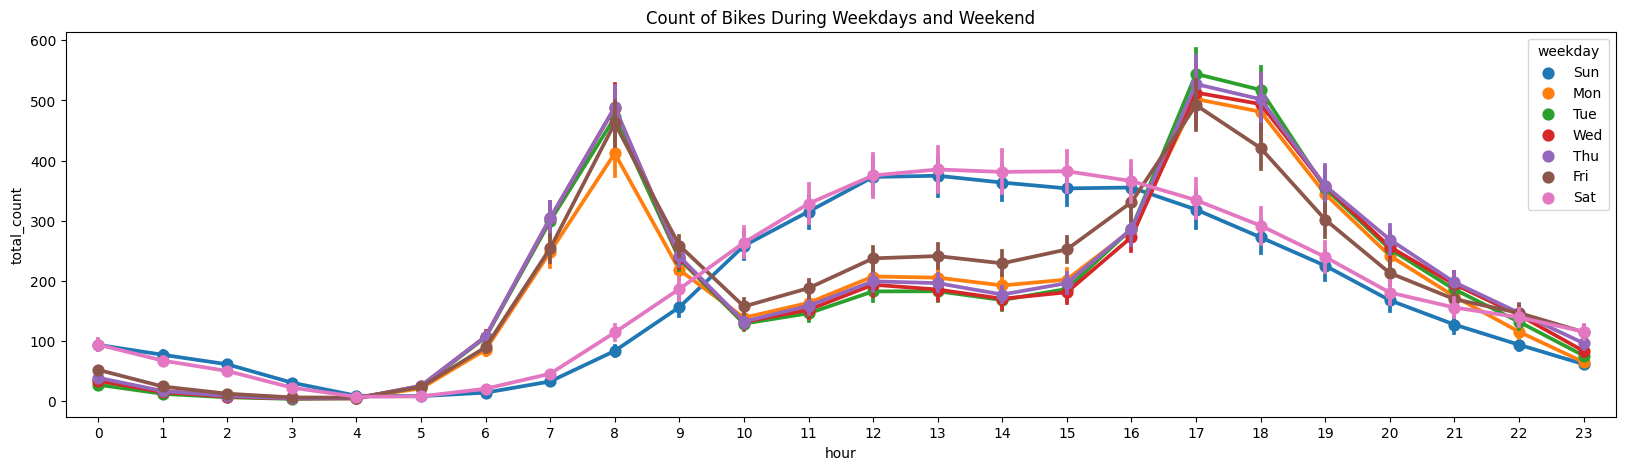

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(
    data=bikes_df, 
    x='hour', 
    y='total_count', 
    hue='weekday', 
    ax=ax
)
ax.set(title='Count of Bikes During Weekdays and Weekend')

Berdasarkan hasil tersebut, terlihat bahwa puncak peminjaman sepeda terjadi pada jam **8 pagi** dan **5 sore** setiap harinya. Hal tersebut menunjukkan sebagian besar pengguna layanan peminjaman sepeda menggunakan sepeda untuk mulai bekerja atau berangkat sekolah.

### Conclusion

**Kesimpulan :** Berdasarkan hasil analisis data, dapat disimpulkan bahwa tren peminjaman sepeda terbanyak terjadi pada musim gugur, dengan perbedaan yang tidak terlalu signifikan antara musim panas dan dingin. Selain itu, peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur, mungkin karena orang lebih memilih beristirahat atau menghabiskan waktu bersama keluarga saat libur. Terakhir, puncak peminjaman sepeda terjadi pada jam 8 pagi dan 5 sore setiap harinya, menunjukkan bahwa sebagian besar pengguna layanan peminjaman sepeda menggunakannya untuk berangkat kerja atau sekolah.

In [44]:
bikes_df.to_csv("bikes_df.csv", index=False)